# MaNGA H$\alpha$ Ring Galaxies Research

## 导入各个package

In [867]:
############ 导入各个package #############
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import astropy_mpl_style
from matplotlib import colors

## 导入数据
ring_fits是162个精选ring galaxies与MPA-JHU数据match之后的141个星系的信息，其中又包含133个星系具有GZ2数据；all_fits是MaNGA目前发布的4824个星系与MPA-JHU数据match之后的2480个星系的信息，其中包含2254个星系具有GZ2数据。

In [558]:
############ 导入数据，ring_fits是162个精选ring galaxies与MPA-JHU数据match之后的141个星系的信息，其中又包含133个星系具有GZ2数据 #########
############ all_fits是MaNGA目前发布的4824个星系与MPA-JHU数据match之后的2480个星系的信息，其中包含2254个星系具有GZ2数据 ############ 
ring_fits=fits.open('2018-02-06-MaNGA-MPA-141-GZ-133-Pipeline3D-141.fits')
all_fits=fits.open('2018-02-06-MaNGA-4824-MPA-2480-GZ1-2297-GZ2-2254-Pipeline3D-2458.fits')

## 2480个MaNGA星系的SFR-MASS图和sSFR-MASS图
画有关mass的图的时候统一用了pipe3D中的**log_Mass**。现在有4个质量，分别是nsa_elpetro_mass, nsa_sersic_mass, MASS-AVG/MEDIAN/..., log_Mass(pipe3D).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


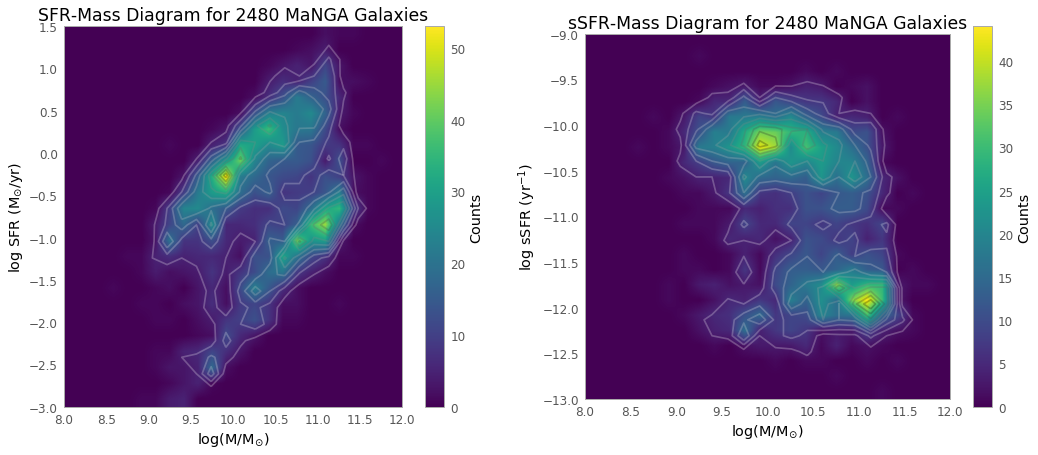

In [453]:
######################## 所有MaNGA星系的SFR-MASS 图 和 sSFR-MASS图 #########################
############ 注意：这张图上只有2480个星系，因为SFR用的是MPA-JHU的数据 ############
tot_log_sersic_mass=np.log10(all_fits[1].data['nsa_sersic_mass'])
tot_log_mass=all_fits[1].data['log_Mass'] ## 注意：如果用MPA的MASS，则MASS-AVG经常是-1，要讨论一下用哪个质量合适. log_Mass是Pipe3D的。
tot_log_SFR=all_fits[1].data['log_SFR_Ha']


step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T


fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
######################## SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
plt.imshow(H, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='Greys', alpha=0.25)
#plt.scatter(match_fits[1].data['log_sersic_mass'][GZmask] ,match_fits[1].data['log_SFR'][GZmask],c=match_fits[1].data['t03_bar_a06_bar_debiased'][GZmask], marker='o', cmap='Greys')
#plt.colorbar(label='Bar debiased')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for 2480 MaNGA Galaxies')

######################## sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
H_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass, tot_log_SFR-tot_log_mass, bins=(bins_for_mass, bins_for_SSFR))
H_SSFR=H_SSFR.T
plt.imshow(H_SSFR, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_SSFR,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap='Greys', alpha=0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for 2480 MaNGA Galaxies')


#plt.savefig('tot_galaxy.png')
plt.show()

Quanlity Control: Pipe3D做出来的这个mass到底靠不靠谱？下图是Pipe3D和sersic_mass的关系，可以看出sersic_mass比pipe3D的小一些。但是显然用Pipe3D的mass和SFR更加像这个图：
![image](http://www.sdss.org/wp-content/uploads/2017/05/sSFR_images_gas.png)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


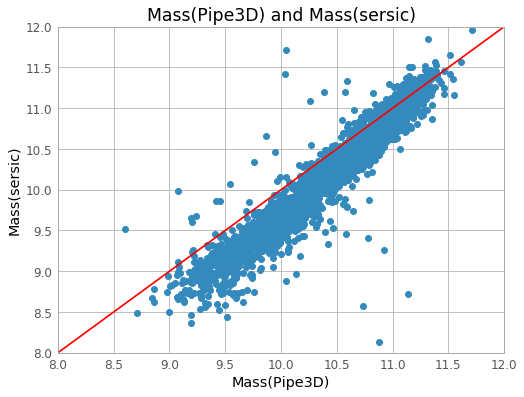

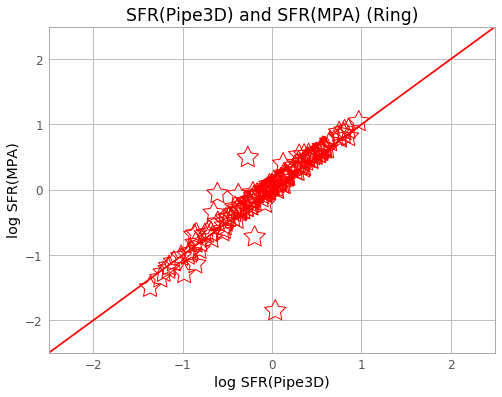

In [586]:
plt.scatter(all_fits[1].data['log_Mass'],np.log10(all_fits[1].data['nsa_sersic_mass']))
x=np.linspace(8,12,100)
plt.plot(x,x,'r')
plt.xlabel('Mass(Pipe3D)')
plt.ylabel('Mass(sersic)')
plt.xlim(8,12)
plt.ylim(8,12)
plt.title('Mass(Pipe3D) and Mass(sersic)')
plt.show()
plt.scatter(ring_fits[1].data['log_SFR_Ha'],ring_fits[1].data['log_SFR'],marker=(5,1,0),s=500, facecolors='none', edgecolors='r')
x=np.linspace(-2.5,2.5,100)
plt.plot(x,x,'r')
plt.xlabel('log SFR(Pipe3D)')
plt.ylabel('log SFR(MPA)')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('SFR(Pipe3D) and SFR(MPA) (Ring)')
plt.show()

## Ring Galaxies的SFR-MASS图和sSFR-MASS图

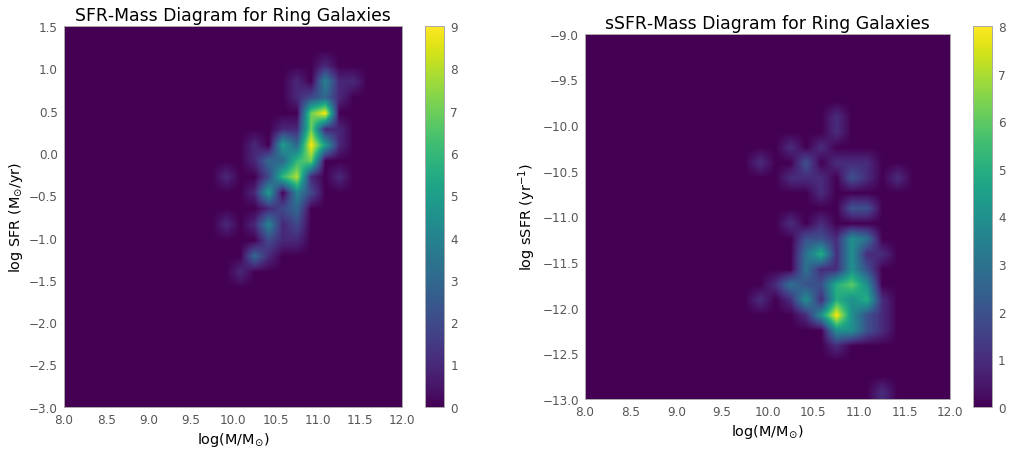

In [454]:
ring_log_sersic_mass=ring_fits[1].data['log_sersic_mass']
ring_log_mass=ring_fits[1].data['log_Mass'] # 来自pipe3D
ring_log_SFR=ring_fits[1].data['log_SFR_Ha']
ring_log_SSFR=ring_fits[1].data['SSFR-AVG']
step=25
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
######################## 画ring的SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
H_ring_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass, ring_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H_ring_SFR=H_ring_SFR.T
plt.imshow(H_ring_SFR, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.colorbar()
plt.title('SFR-Mass Diagram for Ring Galaxies')


#plt.savefig('tot_galaxy.png')

######################## 画ring的sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
H_ring_SSFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass, ring_log_SSFR, bins=(bins_for_mass, bins_for_SSFR))
H_ring_SSFR=H_ring_SSFR.T
plt.imshow(H_ring_SSFR, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.colorbar()
plt.title('sSFR-Mass Diagram for Ring Galaxies')

plt.show()

## Ring Galaxies在整个MaNGA样本中的分布情况
彭老师建议ratio是ring galaxies在一个square中占disk galaxies的比例，因此要除去elliptical galaxies，这里用GZ1来实现。
现在的问题是，如果用MPA的SFR-AVG数据，那么ring galaxies的SFR明显偏小。所以现在的问题是：用哪个SFR。我现在用[Pipel3D](https://data.sdss.org/datamodel/files/MANGA_PIPE3D/MANGADRP_VER/PIPE3D_VER/manga.Pipe3D.html)给出的mass和SFR画的图。

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


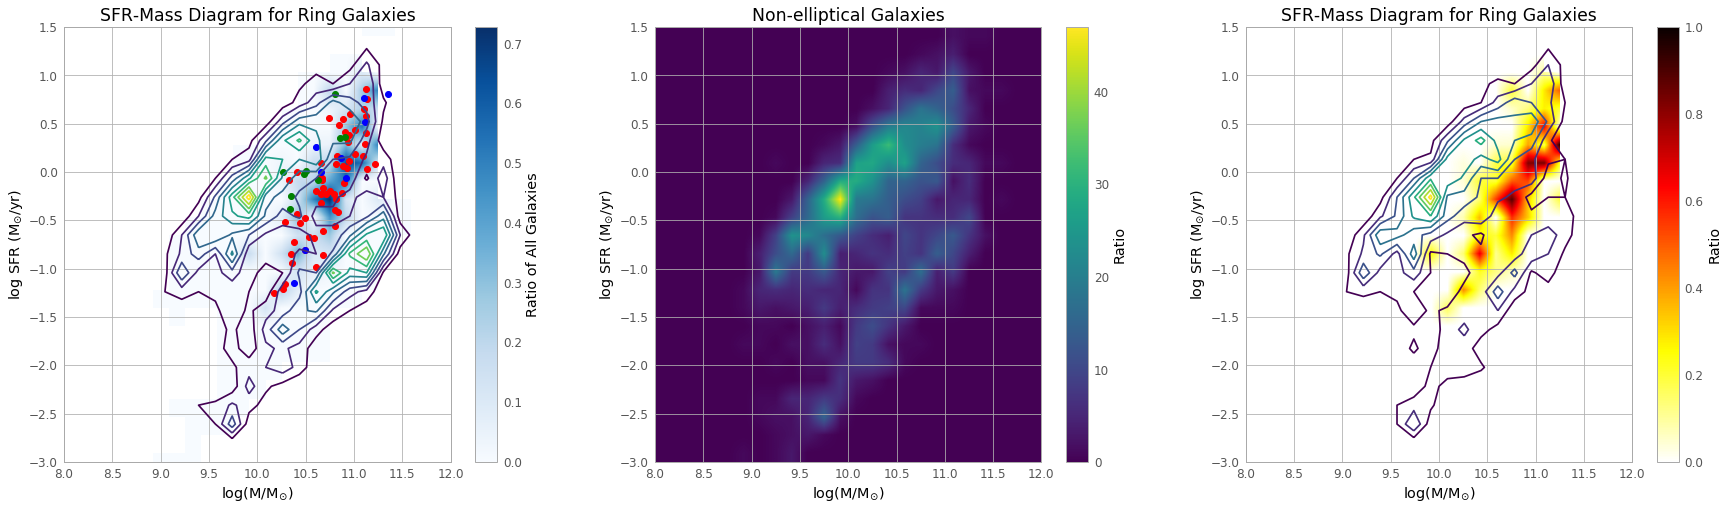

In [455]:
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(30,8))
plt.style.use(astropy_mpl_style)
############## 为GZ1建立mask，同时给GZ1的星系建立各个类别比如spiral的mask。nelli_mask意思是非椭圆星系 ##############
GZ1mask=~np.isnan(all_fits[1].data['SPIRAL']) ## GZ1mask为true的位置是有GZ1
disk_mask=(all_fits[1].data['SPIRAL'][GZ1mask]==1)
elliptical_mask=(all_fits[1].data['ELLIPTICAL'][GZ1mask]==1)
nelli_mask=(all_fits[1].data['ELLIPTICAL'][GZ1mask]!=1)
uncertain_mask=(all_fits[1].data['UNCERTAIN'][GZ1mask]==1)
H_disk, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[GZ1mask][nelli_mask],tot_log_SFR[GZ1mask][nelli_mask], bins=(bins_for_mass, bins_for_SFR))
#H_disk, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[GZ1mask][disk_mask],tot_log_SFR[GZ1mask][disk_mask], bins=(bins_for_mass, bins_for_SFR))
H_disk=H_disk.T

ax1 = plt.subplot2grid((1,3), (0,0))
H_ratio=H_ring_SFR/H
plt.contour(H,10,cmap='viridis',extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
plt.imshow(H_ratio,interpolation='bilinear', origin='low', cmap='Blues', extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio of All Galaxies')
plt.scatter(ring_log_mass[LINER],ring_log_SFR[LINER], color='red')
plt.scatter(ring_log_mass[SF1],ring_log_SFR[SF1], color='green')
plt.scatter(ring_log_mass[np.logical_xor(LINER,AGN)],ring_log_SFR[np.logical_xor(LINER,AGN)], color='blue')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('SFR-Mass Diagram for Ring Galaxies')
plt.grid('on')

ax2 = plt.subplot2grid((1,3), (0,1))
#plt.contour(H,10,cmap='viridis',extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
plt.imshow(H_disk, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
#plt.imshow(H_ratio_disk, interpolation='nearest',origin='low', cmap='hot_r', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('Non-elliptical Galaxies')
plt.grid('on')

ax3 = plt.subplot2grid((1,3), (0,2))
H_ratio_disk=H_ring_SFR/H_disk
plt.contour(H_disk,10,cmap='viridis',extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
#plt.imshow(H_disk, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
norm=colors.Normalize(vmin=0, vmax=1)
plt.imshow(H_ratio_disk, interpolation='bilinear',origin='low', cmap='hot_r', norm=norm, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('SFR-Mass Diagram for Ring Galaxies')
plt.grid('on')

#plt.savefig('SFR-MASS face on ring ratio.png', dpi=600)
plt.show()

# Color Mass Diagram: ugriz

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


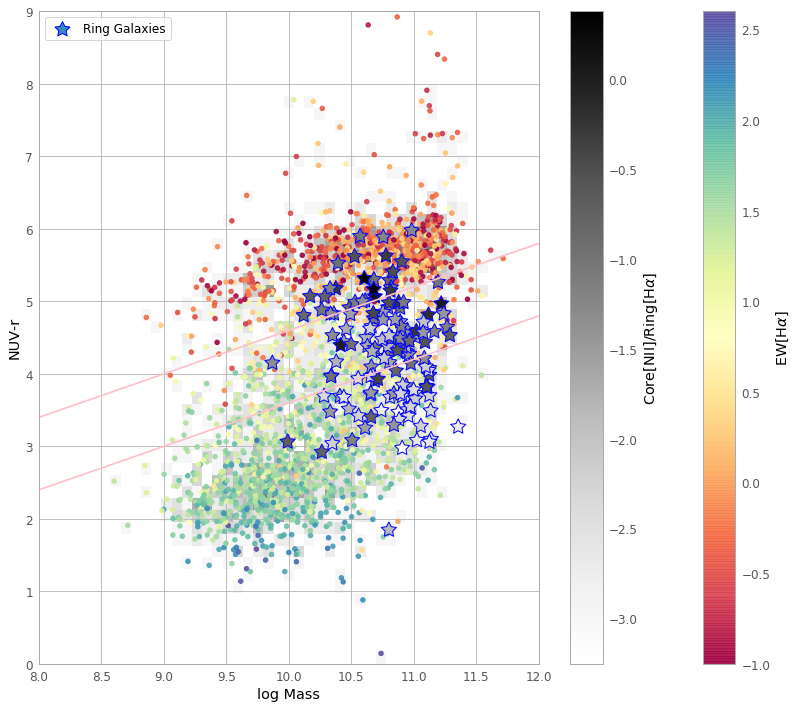

In [669]:
tot_NUV=all_fits[1].data['nsa_sersic_absmag'][:,1]
tot_u=all_fits[1].data['nsa_sersic_absmag'][:,2]
tot_r=all_fits[1].data['nsa_sersic_absmag'][:,4]
tot_i=all_fits[1].data['nsa_sersic_absmag'][:,5]
ring_NUV=ring_fits[1].data['nsa_sersic_absmag'][:,1]
ring_u=ring_fits[1].data['nsa_sersic_absmag'][:,2]
ring_i=ring_fits[1].data['nsa_sersic_absmag'][:,5]
ring_r=ring_fits[1].data['nsa_sersic_absmag'][:,4]
tot_log_mass=all_fits[1].data['log_Mass']
ring_log_mass=ring_fits[1].data['log_Mass']

ring_Lha=ring_fits[1].data['ring_Lha']
core_Lnii=ring_fits[1].data['core_Lnii']

step=50
bins_for_y=np.linspace(0,8,50)
bins_for_x=np.linspace(8,12,50)


fig=plt.figure(figsize=(14,12))
norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_log_mass,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='Spectral', norm=norm, s=20, alpha=0.9)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_log_mass, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

x=np.linspace(8,12,10)
y1=0.6*x-1.4
y2=0.6*x-2.4
plt.plot(x,y1,color='pink')
plt.plot(x,y2,color='pink')
plt.xlim(8,12)
plt.ylim(0,9)
plt.xlabel('log Mass')
plt.ylabel('NUV-r')
plt.scatter(ring_log_mass, ring_NUV-ring_r, s=250, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='Greys', facecolors='none', edgecolors='b',label='Ring Galaxies')
plt.legend()
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')
#plt.savefig('cmd.pdf',dpi=600)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


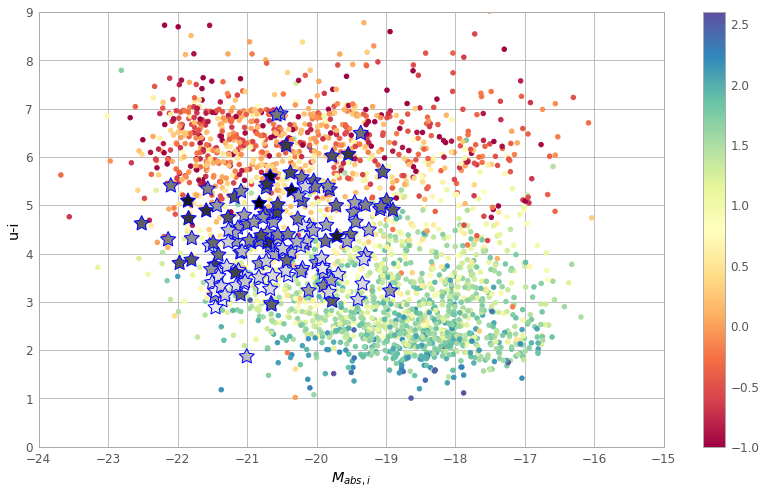

In [657]:
tot_u=all_fits[1].data['nsa_sersic_absmag'][:,0]
tot_i=all_fits[1].data['nsa_sersic_absmag'][:,3]
ring_u=ring_fits[1].data['nsa_sersic_absmag'][:,0]
ring_i=ring_fits[1].data['nsa_sersic_absmag'][:,3]

norm=colors.Normalize(vmin=-1,vmax=2.6)
fig=plt.figure(figsize=(14,8))
plt.scatter(tot_i,tot_u-tot_i, c=np.log10(tot_ew_ha), cmap='Spectral', norm=norm, s=20)

plt.colorbar()
x=np.linspace(-25,-15,10)

plt.xlim(-24,-15)
plt.ylim(0,9)
plt.xlabel('$M_{abs,i}$')
plt.ylabel('u-i')
plt.scatter(ring_i, ring_u-ring_i, s=250, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='Greys', facecolors='none', edgecolors='b')
#plt.savefig('cmd.pdf',dpi=600)
plt.show()

In [537]:
tot_u

array([ 18.64010048,  20.70059967,  18.42469978, ...,  19.76239967,
        19.90889931,  20.60129929], dtype=float32)

## BPT DIAGRAM
通过下面这个BPT diagram，可以看出大多数ring galaxies都是LINER AGN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


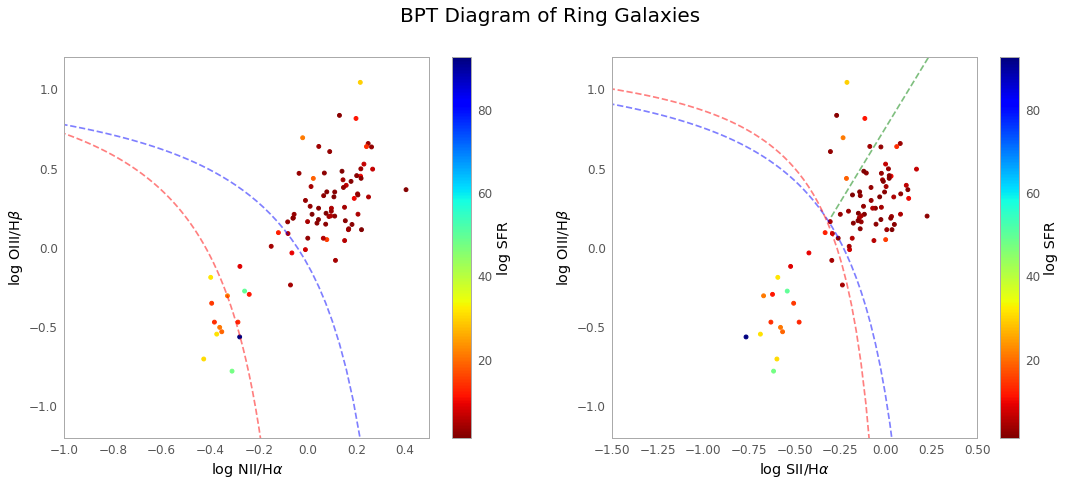

In [480]:
############  141个精选ring galaxies的BPT DIAGRAM （中心3角秒） ################

############  信噪比S/N大于3/√2 的星系才能入选BPT diagram，SN mask为true的即为入选星系  ###############
Lsii_6717=ring_fits[1].data['SII_6717_flux']
Lsii_6731=ring_fits[1].data['SII_6731_flux']
Lsii=Lsii_6717+Lsii_6731    ## 注意：BPT diagram要求将6717和6731谱线相加
err_Lsii=ring_fits[1].data['SII_6717_flux_err']*1.621
SN_sii_6717=Lsii_6717/err_Lsii
SN_sii_6731=Lsii_6731/err_Lsii

Lha=ring_fits[1].data['H_alpha_flux']
err_Lha=ring_fits[1].data['H_alpha_flux_err']*2.473
SN_ha=Lha/err_Lha

Lhb=ring_fits[1].data['H_beta_flux']
err_Lhb=ring_fits[1].data['H_beta_flux_err']*1.882
SN_hb=Lhb/err_Lhb

Loiii=ring_fits[1].data['OIII_5007_flux']
err_Loiii=ring_fits[1].data['OIII_5007_flux_err']*1.566
SN_oiii=Loiii/err_Loiii

Lnii=ring_fits[1].data['NII_6584_flux']
err_Lnii=ring_fits[1].data['NII_6584_flux_err']*2.039
SN_nii=Lnii/err_Lnii

log_SFR=ring_fits[1].data['log_SFR_Ha']

ew_ha=-ring_fits[1].data['EW_HA_CEN']  # # 原始数据说：We follow the convention in which the EW of an emission line is negative and an absorption line is positive

b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii_6717>b,SN_sii_6731>b),SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

############### 绘制 BPT diagram ###############

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ew_ha[SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
#plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ew_ha[SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of Ring Galaxies', size=20)
#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

用Pipe3D的数据画一下BPT diagram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide


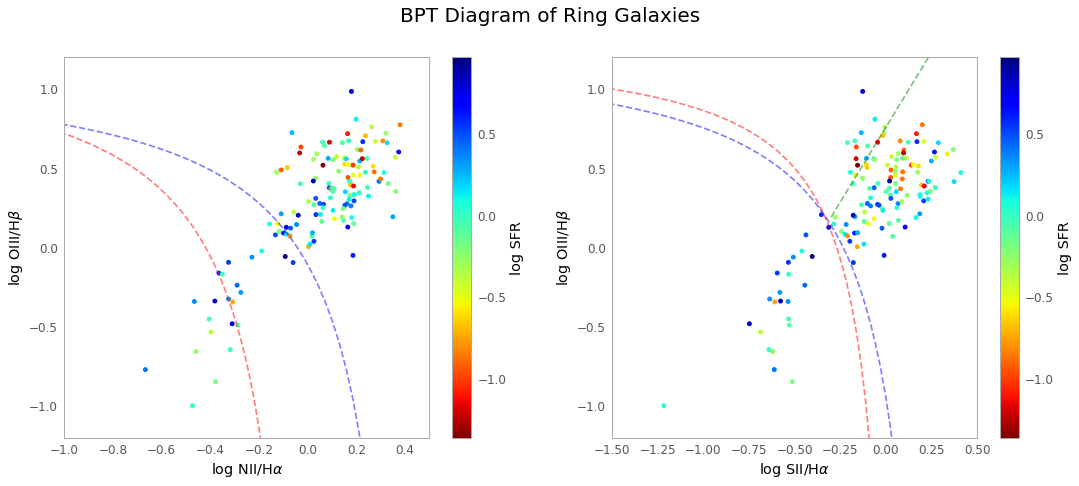

In [472]:
############  141个精选ring galaxies的BPT DIAGRAM （中心2.5角秒） ################

#SN_NII_Ha=ring_fits[1].data['log_NII_Ha_cen']-ring_fits[1].data['e_log_NII_Ha_cen']
#SN_OIII_Hb=ring_fits[1].data['log_OIII_Hb_cen']-ring_fits[1].data['e_log_OIII_Hb_cen']
#SN_SII_Ha=ring_fits[1].data['log_SII_Ha_cen']-ring_fits[1].data['e_log_SII_Ha_cen']

#b=3/np.sqrt(2)
#SNmask=np.logical_and(np.logical_and(SN_NII_Ha>b,SN_OIII_Hb>b),SN_SII_Ha>b)

############### 绘制 BPT diagram ###############

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(ring_fits[1].data['log_NII_Ha_cen'],ring_fits[1].data['log_OIII_Hb_cen'],c=ring_log_SFR, s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
#plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(ring_fits[1].data['log_SII_Ha_cen'],ring_fits[1].data['log_OIII_Hb_cen'],c=ring_log_SFR, s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of Ring Galaxies', size=20)
#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


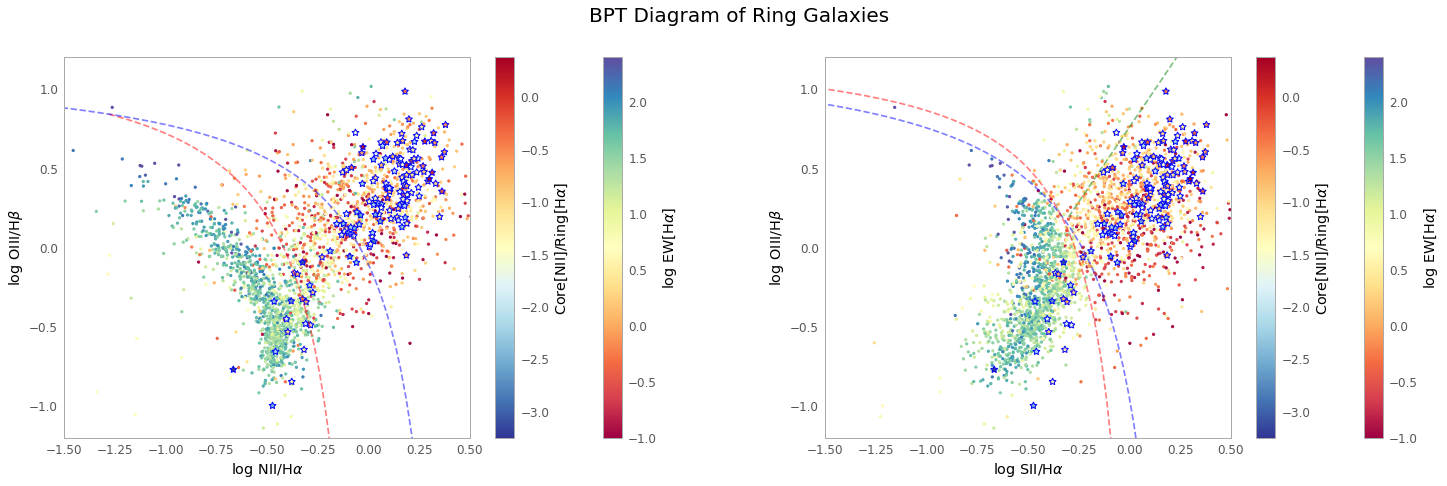

In [668]:
############  141个精选ring galaxies的BPT DIAGRAM （中心2.5角秒） ################

#SN_NII_Ha=ring_fits[1].data['log_NII_Ha_cen']-ring_fits[1].data['e_log_NII_Ha_cen']
#SN_OIII_Hb=ring_fits[1].data['log_OIII_Hb_cen']-ring_fits[1].data['e_log_OIII_Hb_cen']
#SN_SII_Ha=ring_fits[1].data['log_SII_Ha_cen']-ring_fits[1].data['e_log_SII_Ha_cen']

#b=3/np.sqrt(2)
#SNmask=np.logical_and(np.logical_and(SN_NII_Ha>b,SN_OIII_Hb>b),SN_SII_Ha>b)

############### 绘制 BPT diagram ###############
tot_ew_ha=-all_fits[1].data['ew_ha_cen']
ring_ew_ha=-ring_fits[1].data['ew_ha_cen']
ring_Lha=ring_fits[1].data['ring_Lha']
core_Lnii=ring_fits[1].data['core_Lnii']


fig=plt.figure(figsize=(25,7))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
norm=colors.Normalize(vmin=-1,vmax=2.4)
plt.scatter(all_fits[1].data['log_NII_Ha_cen'],all_fits[1].data['log_OIII_Hb_cen'],c=np.log10(tot_ew_ha),norm=norm, s=5, marker='o', cmap='Spectral')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log EW[H$\alpha$]')

plt.scatter(ring_fits[1].data['log_NII_Ha_cen'],ring_fits[1].data['log_OIII_Hb_cen'],s=50, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='RdYlBu_r', facecolors='none', edgecolors='b')
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
#plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
norm=colors.Normalize(vmin=-1,vmax=2.4)
plt.scatter(all_fits[1].data['log_SII_Ha_cen'],all_fits[1].data['log_OIII_Hb_cen'],c=np.log10(tot_ew_ha),norm=norm, s=5, marker='o', cmap='Spectral')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log EW[H$\alpha$]')
plt.scatter(ring_fits[1].data['log_NII_Ha_cen'],ring_fits[1].data['log_OIII_Hb_cen'],s=50, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='RdYlBu_r', facecolors='none', edgecolors='b')
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')

plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of Ring Galaxies', size=20)
#plt.savefig('BPT for ring galaxies.pdf',dpi=600)
plt.show()

In [464]:
############### 判断星系的类型，从两个图中分别判断 ###############
y=ring_fits[1].data['log_OIII_Hb_cen']
x=ring_fits[1].data['log_NII_Ha_cen']
SF1=np.logical_and(np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
Composite=np.logical_and(np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
AGN1=np.logical_xor(np.logical_xor(SF1,SNmask),Composite)
print("AGN number is %d" % np.sum(AGN1))
print("SF number is %d" % np.sum(SF1))
print("Composite number is %d" % np.sum(Composite))
print('')
y=ring_fits[1].data['log_OIII_Hb_cen']
x=ring_fits[1].data['log_SII_Ha_cen']
SF2=np.logical_and(np.logical_and(y<0.48/(x-0.10)+1.30,SNmask),x<0)
LINER=np.logical_and(np.logical_xor(SF2,SNmask),y<1.89*x+0.76)
AGN2=np.logical_and(np.logical_xor(SF2,SNmask),y>1.89*x+0.76)
print("SF number is %d" % np.sum(SF2))
print("LINER number is %d" % np.sum(LINER))
print("AGN number is %d" % np.sum(AGN2))
print('')

print("S/N permitted number is %d" % np.sum(SNmask))

AGN number is 59
SF number is 10
Composite number is 14

SF number is 19
LINER number is 57
AGN number is 7

S/N permitted number is 83


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


# 单个MaNGA星系的BPT diagram
我现在想挑一个星系单独画它的BPT diagram，看看各个区域到底是怎么回事。当然我得挑一个完全face-on的。

redshift= 0.0338343
MaNGA ID= 1-94696


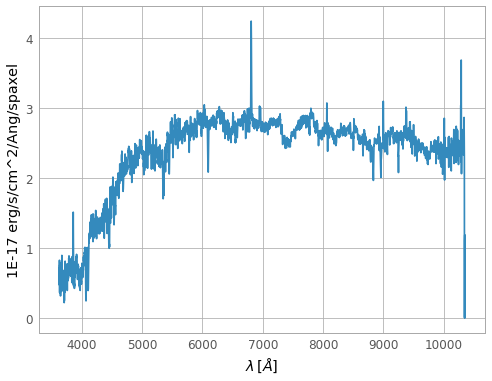

In [913]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
# 导入数据

cube = fits.open('manga-9026-12705-LOGCUBE.fits.gz')
drpall = fits.open('drpall-v2_1_2.fits')
tbdata=drpall[1].data
# 查红移和manga ID
flux_header=cube[1].header
ind=np.where(tbdata['mangaid']==flux_header['MANGAID'])
redshift=tbdata['nsa_z'][ind][0]
print('redshift=',redshift)
print('MaNGA ID=', flux_header['MANGAID'])

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

wave = cube['WAVE'].data
flux_header = cube['FLUX'].header

x_center = np.int(flux_header['CRPIX1']) - 1
y_center = np.int(flux_header['CRPIX2']) - 1
# 画光谱
plt.plot(wave, flux[x_center, y_center]) #flux是一个3维数组了吧，RA, DEC，intensity(对应到wave中的波长）。
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(flux_header['BUNIT'])
plt.show()

a string value was expected. [astropy.wcs.wcs]


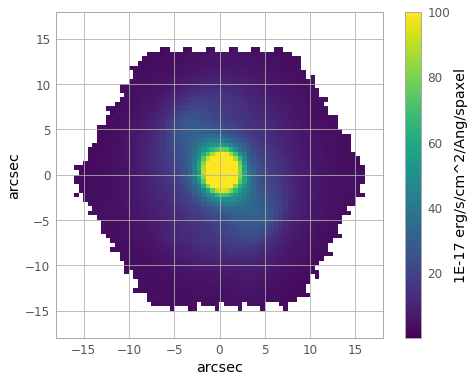

In [914]:
# 画imshow（Hα）
cubeWCS = wcs.WCS(flux_header)

ra = flux_header['OBJRA']
dec = flux_header['OBJDEC']
x_cube_coord, y_cube_coord, __ = cubeWCS.wcs_world2pix([[ra, dec, 1.]], 1)[0]
x_spaxel = np.int(np.round(x_cube_coord)) - 1
y_spaxel = np.int(np.round(y_cube_coord)) - 1

do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.030345
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
plt.imshow(im, extent=extent, cmap='viridis', vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

In [816]:
im[30][30]

24.475258

In [901]:
baby=fits.open('manga-9026-12705.Pipe3D.cube.fits.gz')
cube = fits.open('manga-9026-12705-LOGCUBE.fits.gz')
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))
do_not_use = (mask & 2**10) != 0
BPTmask=do_not_use[:,:,2000]

nii=baby[3].data[46]
ha=baby[3].data[45]
oiii=baby[3].data[26]
hb=baby[3].data[28]
sii=baby[3].data[49]+baby[3].data[50]
e_nii=baby[3].data[46+228]
e_ha=baby[3].data[45+228]
e_oiii=baby[3].data[26+228]
e_hb=baby[3].data[28+228]
e_sii=baby[3].data[49+228]
SN_nii=nii/e_nii
SN_ha=ha/e_ha
SN_oiii=oiii/e_oiii
SN_sii=sii/e_sii
SN_hb=hb/e_hb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid v

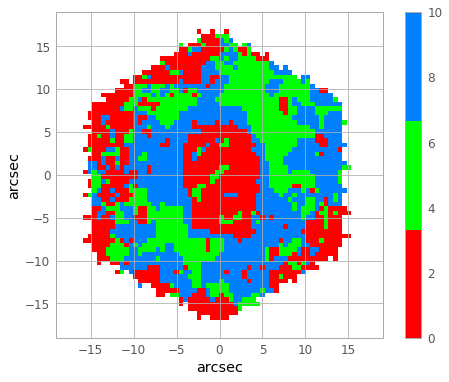

In [911]:
############### 判断星系的类型，从两个图中分别判断 ###############
y=np.log10(oiii/hb)
x=np.log10(nii/ha)
b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii>b,SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

#SF1=np.logical_and(np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
SF1=np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#Composite=np.logical_and(np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
Composite=np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#AGN1=np.logical_xor(np.logical_xor(SNmask,SF1),Composite)
AGN1=np.logical_xor(np.logical_xor(~BPTmask,SF1),Composite)

norm=colors.Normalize(vmin=0,vmax=10)
BPT=AGN1*2+SF1*4+Composite*(7)
myBPT=np.ma.array(BPT, mask=BPTmask)

color = [(1, 0, 0), (0, 1, 0), (0, 0.5, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, color, N=3)

plt.imshow(myBPT, cmap=cm , norm=norm, extent=extent)
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

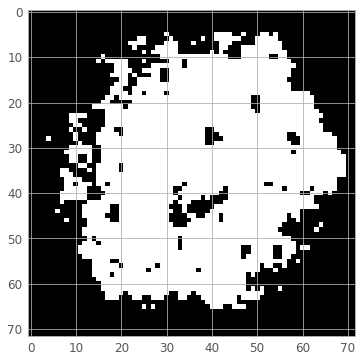

In [908]:
plt.imshow(SNmask)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages

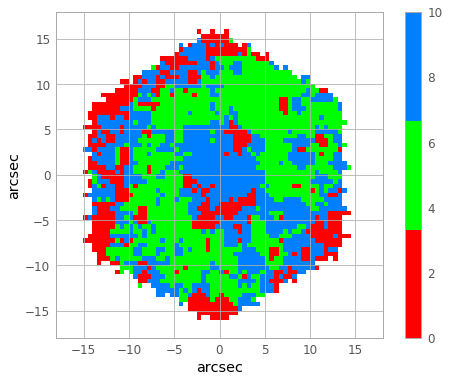

In [921]:
############### 判断星系的类型，从两个图中分别判断 ###############
y=np.log10(oiii/hb)
x=np.log10(sii/ha)
b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii>b,SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

#AGN1=np.logical_xor(np.logical_xor(SNmask,SF1),Composite)

#SF2=np.logical_and(np.logical_and(y<0.48/(x-0.10)+1.30,SNmask),x<0)
SF2=np.logical_and(y<0.48/(x-0.10)+1.30,x<0)
LINER=np.logical_xor(SF2,y<1.89*x+0.76)

AGN2=np.logical_xor(SF2,y>1.89*x+0.76)

norm=colors.Normalize(vmin=0,vmax=10)
BPT=AGN2*2+SF2*4+LINER*(7)
myBPT=np.ma.array(BPT, mask=BPTmask)

color = [(1, 0, 0), (0, 1, 0), (0, 0.5, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, color, N=3)

plt.imshow(myBPT, cmap=cm , norm=norm, extent=extent)
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()